In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(URL-HTML cross)(2).csv")
data

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
0,0,0.975108,0.024892,0.633981,0.366019,0.978432,0.021568
1,1,0.247739,0.752261,0.627640,0.372360,0.875773,0.124227
2,0,0.887242,0.112758,0.580940,0.419060,0.545085,0.454915
3,1,0.001275,0.998725,0.587953,0.412047,0.519370,0.480630
4,0,0.971820,0.028180,0.584020,0.415980,0.651903,0.348097
...,...,...,...,...,...,...,...
2933,0,0.999289,0.000711,0.812124,0.187876,0.828533,0.171467
2934,1,0.577514,0.422486,0.516384,0.483616,0.531246,0.468754
2935,0,0.998221,0.001779,0.975479,0.024521,0.966175,0.033825
2936,1,0.027976,0.972024,0.595263,0.404737,0.670174,0.329826


In [4]:
data.shape

(2938, 7)

In [5]:
data.columns

Index(['labels', 'rfc_prediction_non', 'rfc_prediction_phish',
       'svc_prediction_non', 'svc_prediction_phish', 'lr_prediction_non',
       'lr_prediction_phish'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   rfc_prediction_non    2938 non-null   float64
 2   rfc_prediction_phish  2938 non-null   float64
 3   svc_prediction_non    2938 non-null   float64
 4   svc_prediction_phish  2938 non-null   float64
 5   lr_prediction_non     2938 non-null   float64
 6   lr_prediction_phish   2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5442 - accuracy: 0.7666 - val_loss: 0.5032 - val_accuracy: 0.7755
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7670 - val_loss: 0.4516 - val_accuracy: 0.7789
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7693 - val_loss: 0.4006 - val_accuracy: 0.7823
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.7920 - val_loss: 0.3570 - val_accuracy: 0.8639
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.9054 - val_loss: 0.3196 - val_accuracy: 0.9524
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.9361 - val_loss: 0.2868 - val_accuracy: 0.9592
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.9520 - val_loss: 0.2580 - val_accuracy: 0.9694
Epoch 8/100
8

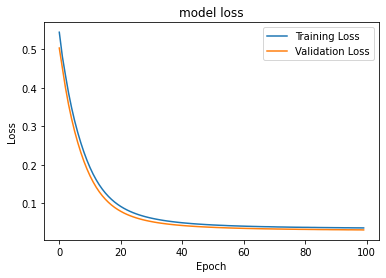

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       229
           1       0.98      0.97      0.98        65

    accuracy                           0.99       294
   macro avg       0.99      0.98      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy: 0.9897959183673469
True Positive 63
True Negative 228
False Positive 1
False Negative 2
Precision: 0.9844
Recall: 0.9692
F1 Score: 0.9767
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.3926 - accuracy: 0.9365 - val_loss: 0.2370 - val_accuracy: 0.9830
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9713 - val_loss: 0.1458 - val_accuracy: 0.9864
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9800 - val_loss: 0.1070 - val_accuracy: 0.9898
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1125 

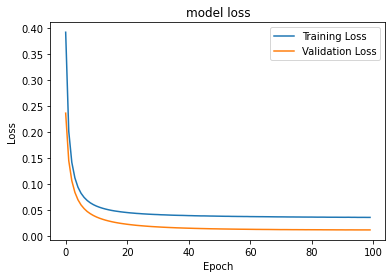

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      0.98      0.99        58

    accuracy                           1.00       294
   macro avg       1.00      0.99      0.99       294
weighted avg       1.00      1.00      1.00       294

Accuracy: 0.9965986394557823
True Positive 57
True Negative 236
False Positive 0
False Negative 1
Precision: 1.0000
Recall: 0.9828
F1 Score: 0.9913
Epoch 1/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4638 - accuracy: 0.9478 - val_loss: 0.3584 - val_accuracy: 0.9524
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9626 - val_loss: 0.2528 - val_accuracy: 0.9660
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9762 - val_loss: 0.1938 - val_accuracy: 0.9694
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.1639 

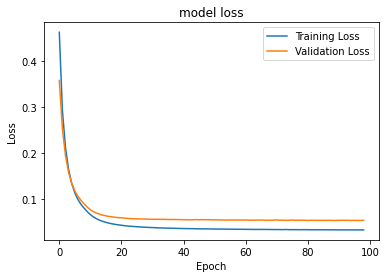

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       221
           1       0.96      1.00      0.98        73

    accuracy                           0.99       294
   macro avg       0.98      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy: 0.9897959183673469
True Positive 73
True Negative 218
False Positive 3
False Negative 0
Precision: 0.9605
Recall: 1.0000
F1 Score: 0.9799
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.8850 - val_loss: 0.3375 - val_accuracy: 0.9728
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.9890 - val_loss: 0.2345 - val_accuracy: 0.9728
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9887 - val_loss: 0.1791 - val_accuracy: 0.9728
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.1489 

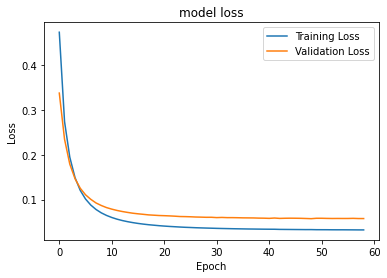

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       218
           1       0.97      0.92      0.95        76

    accuracy                           0.97       294
   macro avg       0.97      0.96      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9727891156462585
True Positive 70
True Negative 216
False Positive 2
False Negative 6
Precision: 0.9722
Recall: 0.9211
F1 Score: 0.9459
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6392 - accuracy: 0.7250 - val_loss: 0.5638 - val_accuracy: 0.9796
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.9747 - val_loss: 0.4975 - val_accuracy: 0.9728
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.9747 - val_loss: 0.4526 - val_accuracy: 0.9762
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4241 

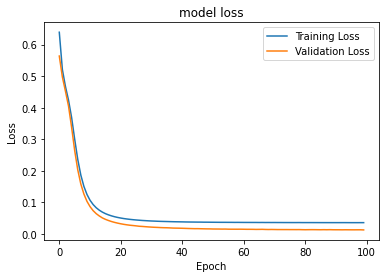

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.98      1.00      0.99        57

    accuracy                           1.00       294
   macro avg       0.99      1.00      0.99       294
weighted avg       1.00      1.00      1.00       294

Accuracy: 0.9965986394557823
True Positive 57
True Negative 236
False Positive 1
False Negative 0
Precision: 0.9828
Recall: 1.0000
F1 Score: 0.9913
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4798 - accuracy: 0.7674 - val_loss: 0.3755 - val_accuracy: 0.7823
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.7670 - val_loss: 0.3082 - val_accuracy: 0.7823
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.7670 - val_loss: 0.2711 - val_accuracy: 0.7823
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2573 

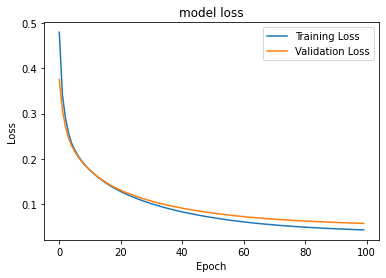

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       230
           1       0.97      0.95      0.96        64

    accuracy                           0.98       294
   macro avg       0.98      0.97      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
True Positive 61
True Negative 228
False Positive 2
False Negative 3
Precision: 0.9683
Recall: 0.9531
F1 Score: 0.9606
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.3418 - accuracy: 0.9800 - val_loss: 0.2501 - val_accuracy: 0.9728
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9826 - val_loss: 0.1735 - val_accuracy: 0.9762
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9849 - val_loss: 0.1358 - val_accuracy: 0.9762
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1145 

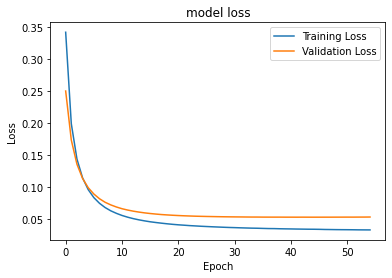

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       213
           1       0.96      0.95      0.96        81

    accuracy                           0.98       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9761904761904762
True Positive 77
True Negative 210
False Positive 3
False Negative 4
Precision: 0.9625
Recall: 0.9506
F1 Score: 0.9565
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.3945 - accuracy: 0.8343 - val_loss: 0.2706 - val_accuracy: 0.9524
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9493 - val_loss: 0.1670 - val_accuracy: 0.9864
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9720 - val_loss: 0.1197 - val_accuracy: 0.9898
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.1257 

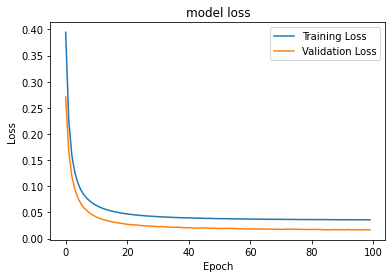

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       223
           1       0.97      1.00      0.99        71

    accuracy                           0.99       294
   macro avg       0.99      1.00      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy: 0.9931972789115646
True Positive 71
True Negative 221
False Positive 2
False Negative 0
Precision: 0.9726
Recall: 1.0000
F1 Score: 0.9861
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5155 - accuracy: 0.7694 - val_loss: 0.3852 - val_accuracy: 0.7713
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8609 - val_loss: 0.2770 - val_accuracy: 0.8976
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9505 - val_loss: 0.2196 - val_accuracy: 0.9352
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1819 

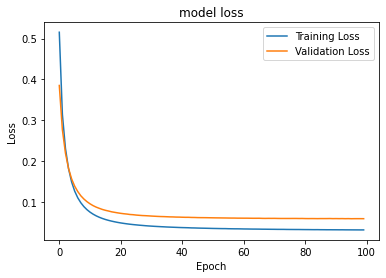

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       226
           1       0.95      0.94      0.95        67

    accuracy                           0.98       293
   macro avg       0.97      0.96      0.97       293
weighted avg       0.98      0.98      0.98       293

Accuracy: 0.9761092150170648
True Positive 63
True Negative 223
False Positive 3
False Negative 4
Precision: 0.9545
Recall: 0.9403
F1 Score: 0.9474
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 1.0191 - accuracy: 0.2318 - val_loss: 0.7441 - val_accuracy: 0.2457
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.4461 - val_loss: 0.4866 - val_accuracy: 0.9829
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.9803 - val_loss: 0.2382 - val_accuracy: 1.0000
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.2077 

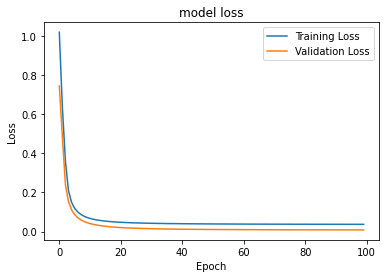

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00        68

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293

Accuracy: 1.0
True Positive 68
True Negative 225
False Positive 0
False Negative 0
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Average Validation Accuracy: 0.9874068398690534


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

